# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

#tf.enable_eager_execution()

2.3.0


####Вспомогательный код

In [12]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

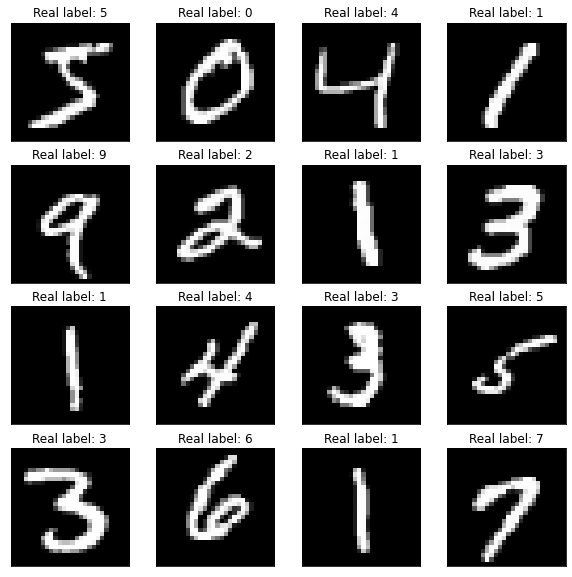

In [4]:
(Xt, Yt), (Xv, Yv) = tf.keras.datasets.mnist.load_data()
Xt, Xv = Xt / 255.0, Xv / 255.0

show_mnist(Xt, Yt)
Xt = Xt.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
Xv = Xv.reshape((-1, 28*28))


In [5]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/My Drive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [39]:
# < YOUR CODE STARTS HERE >
import keras
import keras.layers as L

model = keras.models.Sequential()
model.add(L.Input(shape=(784,)))
model.add(L.Dense(784, activation='relu'))
model.add(L.Dense(64, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xt, Yt, epochs=5, validation_data=(Xv, Yv), callbacks=[keras.callbacks.ModelCheckpoint(filepath=cpt_path, monitor="val_accuracy", save_best_only=True)])

# < YOUR CODE ENDS HERE >

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1912 - accuracy: 0.9422 - val_loss: 0.0962 - val_accuracy: 0.9704
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0798 - accuracy: 0.9749 - val_loss: 0.0772 - val_accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.0712 - val_accuracy: 0.9782
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0760 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0704 - val_accuracy: 0.9805


In [34]:
history.history

{'accuracy': [0.9423999786376953,
  0.9746333360671997,
  0.9828000068664551,
  0.9865833520889282,
  0.9900500178337097],
 'loss': [0.19057892262935638,
  0.08057419955730438,
  0.05479918047785759,
  0.040728263556957245,
  0.030593637377023697],
 'val_accuracy': [0.9678999781608582,
  0.9739999771118164,
  0.9771999716758728,
  0.9787999987602234,
  0.979200005531311],
 'val_loss': [0.10033776611089706,
  0.08162056654691696,
  0.07426044344902039,
  0.07428433001041412,
  0.07723387330770493]}

In [35]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

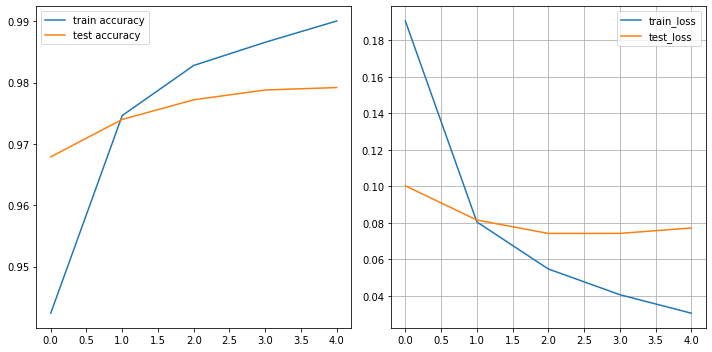

In [36]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [40]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(Xv, Yv, batch_size=10)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0704 - accuracy: 0.0986
Accuracy of restored model 9.86%


AssertionError: ignored

И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

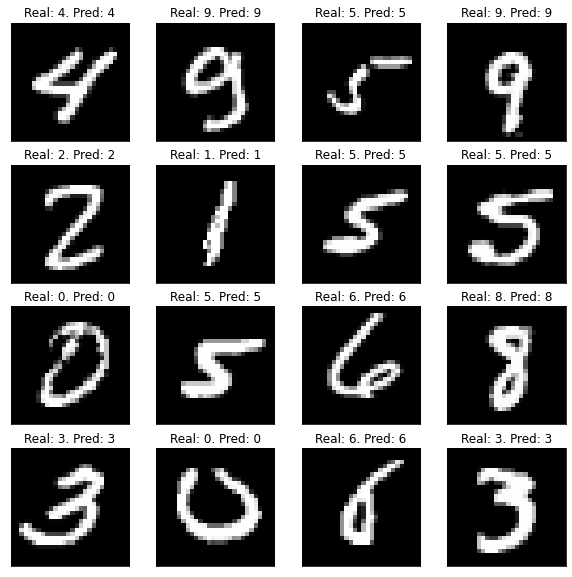

In [42]:
predicted_labels = restored_model.predict_classes(Xv)
idxs = np.random.choice(np.arange(len(Xv)), 16, replace=False)
show_mnist(Xv[idxs].reshape((-1, 28, 28)), Yv[idxs], predicted_labels[idxs])